In [1]:
import os
os.chdir("../../")
os.getcwd()

'/home/riccardo/Desktop/spatial_lda'

In [2]:
#########################

In [3]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns

from scipy.stats import t, skewnorm, cauchy, norm, chi2

from spatial_mix.utils import *

### Load all chains data and density estimates

In [4]:
datas = []

spmix_chains = []
spmix_dens = []
hdp_chains = []
hdp_dens = []
output_path = "data/simulation2/"


data_filename = os.path.join(
    output_path + "data.csv")
datas.append(pd.read_csv(data_filename))
    
weights_filename = os.path.join(
    output_path + "weights.csv")
weights = pd.read_csv(weights_filename).values

spmix_chains_filename = os.path.join(
    output_path + "spmix_chains.recordio")
spmix_chains.append(loadChains(spmix_chains_filename))

spmix_dens_filename = os.path.join(
    output_path + "spmix_dens.pickle")
with open(spmix_dens_filename, "rb") as fp:
    spmix_dens.append(pickle.load(fp))

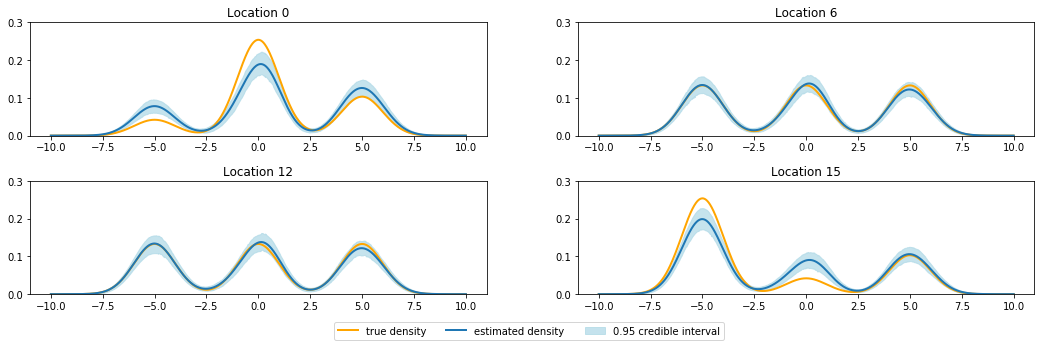

In [12]:
from spatial_mix.plots import density_plot

xgrid = spmix_dens[0]["xgrid"]

fig, axes = plt.subplots(2, 2, figsize=(18, 5))
    
g = 0
density_plot(spmix_dens[0]["dens"][g], 
             weights[g][0] * norm.pdf(xgrid, -5, 1.0) 
             + weights[g][1] * norm.pdf(xgrid, 0.0, 1.0) 
             + weights[g][2] * norm.pdf(xgrid, 5.0, 1.0), 
             xgrid, axes[0][0], 
             "Location "+str(g))

g = 6
density_plot(spmix_dens[0]["dens"][g], 
             weights[g][0] * norm.pdf(xgrid, -5, 1.0) 
             + weights[g][1] * norm.pdf(xgrid, 0.0, 1.0) 
             + weights[g][2] * norm.pdf(xgrid, 5.0, 1.0), 
             xgrid, axes[0][1], 
             "Location "+str(g))

g = 12
density_plot(spmix_dens[0]["dens"][g], 
             weights[g][0] * norm.pdf(xgrid, -5, 1.0) 
             + weights[g][1] * norm.pdf(xgrid, 0.0, 1.0) 
             + weights[g][2] * norm.pdf(xgrid, 5.0, 1.0), 
             xgrid, axes[1][0], 
             "Location "+str(g))

g=15
density_plot(spmix_dens[0]["dens"][g], 
             weights[g][0] * norm.pdf(xgrid, -5, 1.0) 
             + weights[g][1] * norm.pdf(xgrid, 0.0, 1.0) 
             + weights[g][2] * norm.pdf(xgrid, 5.0, 1.0), 
             xgrid, axes[1][1], 
             "Location "+str(g))

for i in range(2):
    for j in range(2):
        axes[i][j].set_ylim((0, 0.3))

#axes[1].set_xlim((-1, 10))
#axes[0].set_xlim((2, 10))

plt.subplots_adjust(hspace = 0.4)
#axes[0].set_ylabel("SP MIX", fontsize=16)
#axes[1][0].set_ylabel("HDP", fontsize=16)

axes[1][0].legend(bbox_to_anchor=(1.53, -0.2), ncol=3)

plt.savefig("images/simulation2_densities.pdf", )
plt.show()